In [1]:
# System Libraries
import warnings
warnings.filterwarnings("ignore")

# Handle missing values
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import ExtraTreesRegressor

# Data manipulation Libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder # Import LabelEncoder() function
from sklearn.model_selection import train_test_split # Import train test split function

# Model Libraries 
from sklearn.ensemble import RandomForestClassifier # Import Decision Tree Classifier
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

# Visualization Libraries
from sklearn.tree.export import export_text # Extract Tree rules
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image 
import pydotplus
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\rahul.s\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


In [2]:
## Funcion to check if a column name is part of list or not
def columnCheck(list1,list2,listName):
    try:
           if (set(list1).issubset(list2)) == False:
               raise NameError()
    except:
           print("Please ensure columns are available in " + listName + " list")

path = "C:/Users/rahul.s/Desktop/Credit Data.xlsx"

# Load the dataset¶
Let's load the dataset and have a look at all the variables available

In [3]:
credit1 = pd.read_excel('C:/Users/rahul.s/Desktop/Credit Data.xlsx')
print("Columns available:\n",credit1.columns)
print("\n\nDataset:\n",credit1.head())

Columns available:
 Index(['Customer ID', 'Card Type', 'Product', 'Balance', 'Balance Frequency',
       'Purchases', 'One Off Purchases', 'Installment Purchases',
       'Cash Advance', 'Purchase Frequency', 'One Off Purchase Frequency',
       'Purchases Installments Frequency', 'Cash Advance Frequency',
       'Cash Advance Transactions', 'Purchases Transactions', 'Credit Limit',
       'Payments', 'Minimum Payments', 'Percentage Full Payment', 'Tenure',
       'Attrited'],
      dtype='object')


Dataset:
    Customer ID Card Type Product  Balance  Balance Frequency  Purchases  \
0        10001  Standard  Silver      409           0.818182        954   
1        10002  Standard  Silver    32025           0.909091          0   
2        10003  Standard  Silver    24951           1.000000       7732   
3        10004  Standard  Silver    16667           0.636364      14990   
4        10005  Standard  Silver     8177           1.000000        160   

   One Off Purchases  Installment

In [4]:
credit = credit1.drop(['Customer ID'],axis=1)
credit.head()

,Card Type,Product,Balance,Balance Frequency,Purchases,One Off Purchases,Installment Purchases,Cash Advance,Purchase Frequency,One Off Purchase Frequency,Purchases Installments Frequency,Cash Advance Frequency,Cash Advance Transactions,Purchases Transactions,Credit Limit,Payments,Minimum Payments,Percentage Full Payment,Tenure,Attrited
0,Standard,Silver,409,0.818182,954,0,954,0,0.166667,0.000000,0.083333,0.000000,0,2,10000,2018,1395,0.000000,12,0
1,Standard,Silver,32025,0.909091,0,0,0,64429,0.000000,0.000000,0.000000,0.250000,4,0,70000,41030,10723,0.222222,12,0
2,Standard,Silver,24951,1.000000,7732,7732,0,0,1.000000,1.000000,0.000000,0.000000,0,12,75000,6221,6273,0.000000,12,0
3,Standard,Silver,16667,0.636364,14990,14990,0,2058,0.083333,0.083333,0.000000,0.083333,1,1,75000,0,0,0.000000,12,0
4,Standard,Silver,8177,1.000000,160,160,0,0,0.083333,0.083333,0.000000,0.000000,0,1,12000,6783,2448,0.000000,12,0


In [5]:
credit.shape

(8950, 20)

In [6]:
credit.describe()

,Balance,Balance Frequency,Purchases,One Off Purchases,Installment Purchases,Cash Advance,Purchase Frequency,One Off Purchase Frequency,Purchases Installments Frequency,Cash Advance Frequency,Cash Advance Transactions,Purchases Transactions,Credit Limit,Payments,Minimum Payments,Percentage Full Payment,Tenure,Attrited
count,8950.00000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000
mean,15644.74648,0.877271,10032.081341,5924.396089,4110.695531,9788.712626,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,44939.472737,17331.437989,8339.833966,0.153715,11.517318,0.215307
std,20815.31786,0.236904,21366.356826,16598.889720,9043.386261,20971.636594,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,36389.225442,28950.639913,23359.901483,0.292499,1.338331,0.411058
min,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,0.000000
25%,1283.25000,0.888889,396.500000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,16000.000000,3833.000000,1630.000000,0.000000,12.000000,0.000000
50%,8734.00000,1.000000,3613.000000,380.000000,890.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,30000.000000,8569.000000,2896.500000,0.000000,12.000000,0.000000
75%,20541.50000,1.000000,11101.500000,5773.750000,4686.750000,11138.500000,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,65000.000000,19011.500000,7887.000000,0.142857,12.000000,0.000000
max,190431.00000,1.000000,490396.000000,407613.000000,225000.000000,471372.000000,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,300000.000000,507215.000000,764062.000000,1.000000,12.000000,1.000000


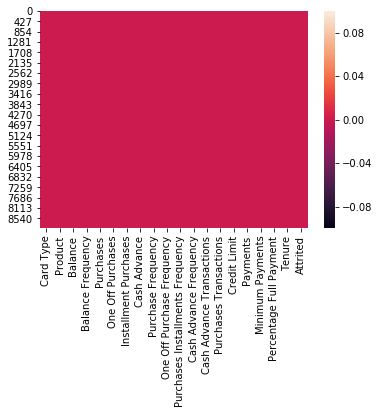

In [7]:
sns.heatmap(credit.isnull())

# EDA

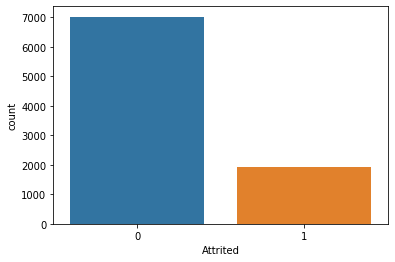

In [8]:
#to check number of people who attired.
sns.countplot(x='Attrited',data=credit)

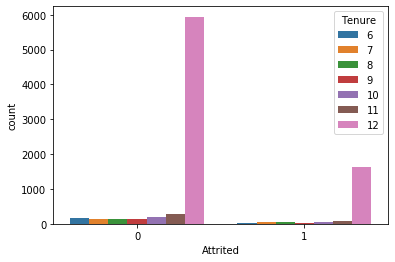

In [9]:
#number of people that attired based on Tenure.
sns.countplot(x='Attrited',data=credit,hue="Tenure")

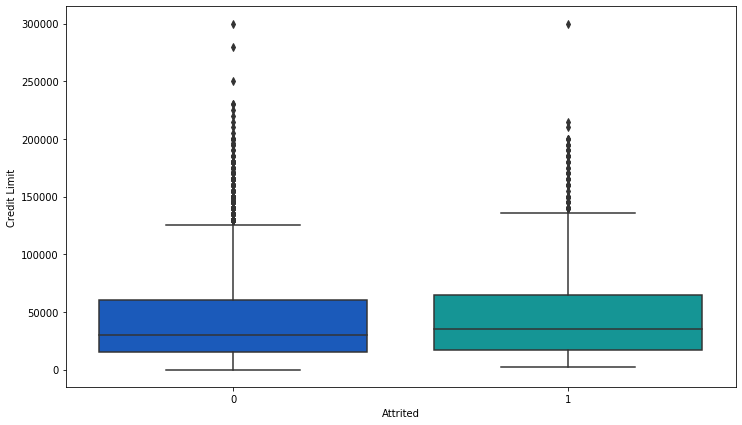

In [10]:
plt.figure(figsize=(12,7))
sns.boxplot(x='Attrited',y='Credit Limit',data=credit,palette='winter')

# Label Encoding and One-Hot Encoding On Card Type and Product

In [11]:
label_encode = ['Card Type','Product']

le = LabelEncoder() # instantiate labelencoder object
credit[label_encode] = credit[label_encode].apply(lambda col: le.fit_transform(col))
print("Label Encoded Columns:\n",credit[label_encode].head(20))

Label Encoded Columns:
     Card Type  Product
0           2        4
1           2        4
2           2        4
3           2        4
4           2        4
5           2        4
6           2        4
7           2        4
8           2        4
9           2        4
10          2        4
11          2        4
12          2        4
13          2        4
14          2        4
15          2        4
16          2        4
17          2        4
18          2        4
19          2        4


In [12]:
hot_encode = ['Card Type','Product']

credit = pd.get_dummies(credit, columns=hot_encode, drop_first=True)
print("Dummy Columns for Card Type and Project: \n",credit.columns)

Dummy Columns for Card Type and Project: 
 Index(['Balance', 'Balance Frequency', 'Purchases', 'One Off Purchases',
       'Installment Purchases', 'Cash Advance', 'Purchase Frequency',
       'One Off Purchase Frequency', 'Purchases Installments Frequency',
       'Cash Advance Frequency', 'Cash Advance Transactions',
       'Purchases Transactions', 'Credit Limit', 'Payments',
       'Minimum Payments', 'Percentage Full Payment', 'Tenure', 'Attrited',
       'Card Type_1', 'Card Type_2', 'Card Type_3', 'Product_1', 'Product_2',
       'Product_3', 'Product_4', 'Product_5', 'Product_6'],
      dtype='object')


In [13]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 27 columns):
Balance                             8950 non-null int64
Balance Frequency                   8950 non-null float64
Purchases                           8950 non-null int64
One Off Purchases                   8950 non-null int64
Installment Purchases               8950 non-null int64
Cash Advance                        8950 non-null int64
Purchase Frequency                  8950 non-null float64
One Off Purchase Frequency          8950 non-null float64
Purchases Installments Frequency    8950 non-null float64
Cash Advance Frequency              8950 non-null float64
Cash Advance Transactions           8950 non-null int64
Purchases Transactions              8950 non-null int64
Credit Limit                        8950 non-null int64
Payments                            8950 non-null int64
Minimum Payments                    8950 non-null int64
Percentage Full Payment             8950 no

In [14]:
#Creating training data set
X = credit.drop(['Attrited'],axis =1 )
y = credit['Attrited']

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

# Build a Random Forest Classifier 

In [16]:
rf = RandomForestClassifier(class_weight={1:2},
                              oob_score=True,
                              random_state=21)

In [17]:
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight={1: 2}, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=True, random_state=21, verbose=0,
                       warm_start=False)

In [18]:
#prediction on Training data
y_train_pred = rf.predict(X_train)
y_train_pred[0:20]


array([1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0],
      dtype=int64)

In [19]:
#prediction on Test data
y_pred = rf.predict(X_test)
y_pred[0:20]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
      dtype=int64)

In [20]:
# Performance on Out Of Bag sample
print("Performance on Out Of Bag sample")
print("OOB Error:{0:0.2f}".format(rf.oob_score_))

# Evaluate performance on Train set
print("\n\nPerformance on Train Set:")
print("Confusion Matrix:",metrics.confusion_matrix(y_train, y_train_pred))
print("\nAccuracy: {0:0.2f}".format(metrics.accuracy_score(y_train, y_train_pred)))
print("Precision: {0:0.2f}".format(metrics.precision_score(y_train, y_train_pred, average="macro")))
print("Recall: {0:0.2f}".format(metrics.recall_score(y_train, y_train_pred, average="macro")))
print("f1 score: {0:0.2f}".format(metrics.f1_score(y_train, y_train_pred, average="macro")))  

print("\n\nPerformance on Test Set:")
print("Confusion Matrix:",metrics.confusion_matrix(y_test, y_pred))
print("\nAccuracy:{0:0.2f}".format(metrics.accuracy_score(y_test, y_pred)))
print("Precision: {0:0.2f}".format(metrics.precision_score(y_test, y_pred, average="macro")))
print("Recall: {0:0.2f}".format(metrics.recall_score(y_test, y_pred, average="macro"))) 
print("f1 score: {0:0.2f}".format(metrics.f1_score(y_test, y_pred, average="macro")))  

Performance on Out Of Bag sample
OOB Error:0.74


Performance on Train Set:
Confusion Matrix: [[4899    2]
 [ 175 1189]]

Accuracy: 0.97
Precision: 0.98
Recall: 0.94
f1 score: 0.96


Performance on Test Set:
Confusion Matrix: [[2046   76]
 [ 542   21]]

Accuracy:0.77
Precision: 0.50
Recall: 0.50
f1 score: 0.47


In [21]:
importances = rf.feature_importances_
print(importances)

[0.10561221 0.03171282 0.07445704 0.05143317 0.05784233 0.05757465
 0.03177013 0.03374745 0.03001456 0.03501737 0.03789269 0.05804262
 0.08412685 0.10975236 0.10589926 0.0316297  0.01678971 0.00324356
 0.00819025 0.00270149 0.00206816 0.00564855 0.00911409 0.01152056
 0.00229658 0.00190185]


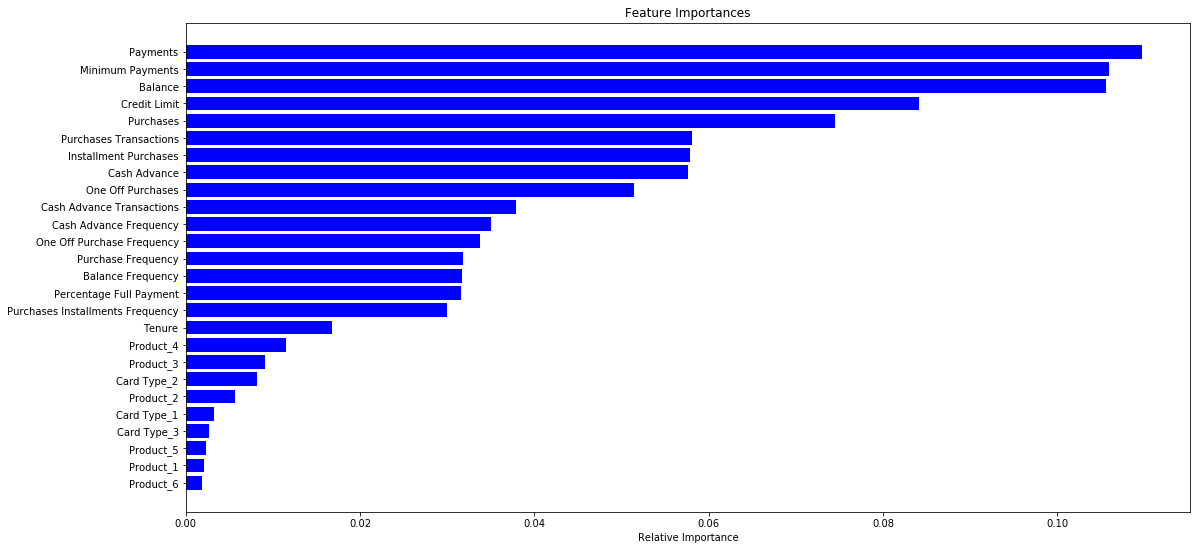

In [22]:
features = X.columns
importances = rf.feature_importances_
indices = np.argsort(importances)


plt.figure(figsize=(18,9))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

Feature that are causing Customers to leave :
Payments,
Minimum Payments,
Balance,
Credit  Limit,
Purchases,
Purchase Transactions,
Installment Purchases,
Cash Advance



In [26]:
final_data = pd.DataFrame({'Customer ID':Customer ID,'Attrited':y_train_pred})
final_data.head()

SyntaxError: invalid syntax (<ipython-input-26-bb1a55631f65>, line 1)